In [1]:
from utils import *
from tests import *
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


In [ ]:
actin, axon, dendrite = test_image(0, "model_yang", thresh_results=False)

In [1]:
from multi_testing import *
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


######## TESTING MODEL model_yang #########
######## LOADING THE MODEL ###########


/home/maewanto/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


number of training examples = 4
number of test examples = 3
X_train shape: (4, 224, 224, 1)
Y_train shape: (4, 224, 224, 2)
X_test shape: (3, 224, 224, 1)
Y_test shape: (3, 224, 224, 2)
######## RUNNING THE MODEL ###########


/home/maewanto/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:95: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 2 samples, validate on 2 samples
Epoch 1/3
Epoch 00001: val_loss improved from inf to 25.21000, saving model to /media/maewanto/B498-74ED/Data_projet_apprentissage/models_weights/model_yang_weights.hdf5
2/2 [==============================] - 17s 9s/step - loss: 29.7410 - acc: 0.4657 - val_loss: 25.2100 - val_acc: 0.5468
Epoch 2/3
Epoch 00002: val_loss improved from 25.21000 to 25.05515, saving model to /media/maewanto/B498-74ED/Data_projet_apprentissage/models_weights/model_yang_weights.hdf5
2/2 [==============================] - 5s 2s/step - loss: 22.4822 - acc: 0.6944 - val_loss: 25.0552 - val_acc: 0.4840
Epoch 3/3
Epoch 00003: val_loss did not improve
2/2 [==============================] - 1s 392ms/step - loss: 18.4819 - acc: 0.8531 - val_loss: 35.7331 - val_acc: 0.4840
######## LOADING THE BEST WEIGHTS ###########
######## EVALUATING THE MODEL ###########
3/3 [==============================] - 1s 425ms/step

Loss = 25.2303600311
Test Accuracy = 0.481577992439
######## TEST

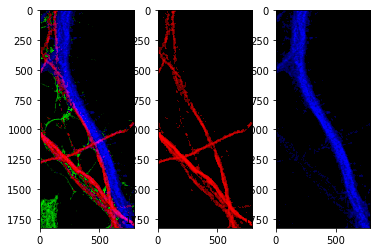

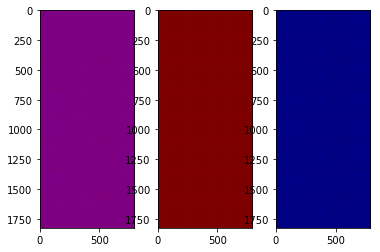

######## TESTING MODEL model_yang_with_conv2dtranspose #########
######## LOADING THE MODEL ###########
number of training examples = 4
number of test examples = 3
X_train shape: (4, 224, 224, 1)
Y_train shape: (4, 224, 224, 2)
X_test shape: (3, 224, 224, 1)
Y_test shape: (3, 224, 224, 2)
######## RUNNING THE MODEL ###########
Train on 2 samples, validate on 2 samples
Epoch 1/3


In [ ]:
models_to_test = [
    {
        'name': 'model_yang',
        'return_all': False,
        'nb_examples': 7,
        'validation_split': 0.3,
        'epochs': 3,
        'batch_size': 2,
        'use_saved_weights': False
    },
    {
        'name': 'model_yang_with_conv2dtranspose',
        'return_all': False,
        'nb_examples': 7,
        'validation_split': 0.3,
        'epochs': 3,
        'batch_size': 2,
        'use_saved_weights': False
    }
]

run_multi_tests(models_to_test)

In [ ]:
X_train, X_test, y_train, y_test = load_dataset(False, 10)

In [2]:
save_dataset(2, 0.1)

AUGMENTING THE DATA
0
SAVING THE HDF5 FILE
DONE


In [3]:
min_ones_ratio = 0.1
min_ones = crop_size * min_ones_ratio
cpt = 0
for i in range(0, 1040):
    if i % 10 == 0:
        print(i)
    x = np.load(folder_images_saving_train_x + "/" + str(i) + ".npy")
    y = np.load(folder_images_saving_train_y + "/" + str(i) + ".npy")
    crops_x, crops_y = get_all_crops(x, y)
    length = crops_x.shape[0]
    for j in range(0, length):
        # We do not want to keep too many black crops, so we make sure there is some data in both train and label
        # matrices before taking the flips.
        if np.sum(crops_x[j]) > min_ones and np.sum(crops_y[j, :, :, 0]) > min_ones and np.sum(crops_y[j, :, :, 1]) > min_ones:
            flips_x, flips_y = get_flips_images(crops_x[j], crops_y[j])
            for k in range(0, 3):
                cpt += 1
        else:
            cpt += 1

print("++++")
print(cpt)

AUGMENTING THE DATA
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
++++
118145


In [19]:
# 118145
with h5py.File(main_folder_path + "/test.hdf5", 'w') as f:
    dataset = f.create_dataset("X", (cpt, crop_size, crop_size, 1))
    
with h5py.File(main_folder_path + "/test.hdf5", 'a') as f:
    f['X'][:10] = np.ones((10, crop_size, crop_size, 1))

# print(dataset.shape)
# dataset[:10]

RuntimeError: Can't decrement id ref count (unable to extend file properly, errno = 27, error message = 'File too large')

/media/maewanto/B498-74ED/Data_projet_apprentissage
